In [2]:
from google.colab import files
uploaded= files.upload()

Saving OurData.csv to OurData.csv


In [3]:
import pandas as pd

# Load your dataset here
df = pd.read_csv('OurData.csv')

# Check for null values
if df.isnull().values.any():
    print("Null values are present in the dataset.")
    
    # Determine how to handle the null values based on your dataset
    # For example, if the dataset has many null values in a certain column, it may be better to drop the entire column
    # Alternatively, if the dataset has only a few null values, it may be better to fill those values with the column's mean, median, or mode value
    
    # Fill null values
    df.fillna(value=0, inplace=True) # Fill null values with 0 (Replace with your desired value)
    print("Null values have been filled.")
    
    # Drop rows with null values
    df.dropna(inplace=True) # Drop rows with null values
    print("Rows with null values have been dropped.")
else:
    print("No null values are present in the dataset.")


No null values are present in the dataset.


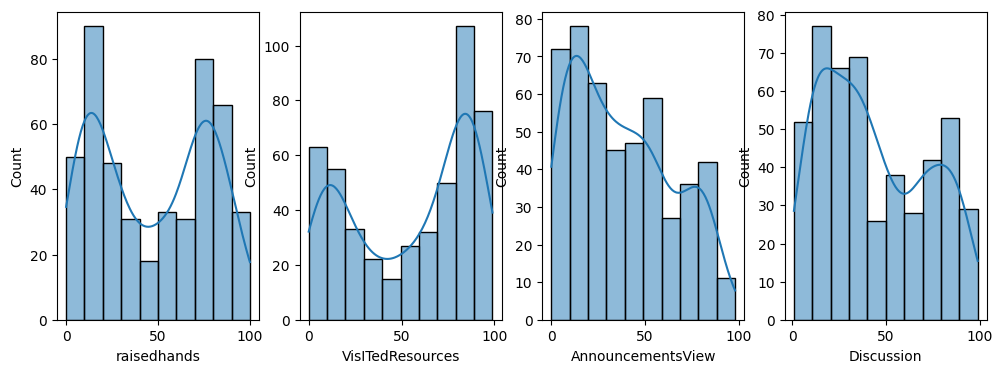

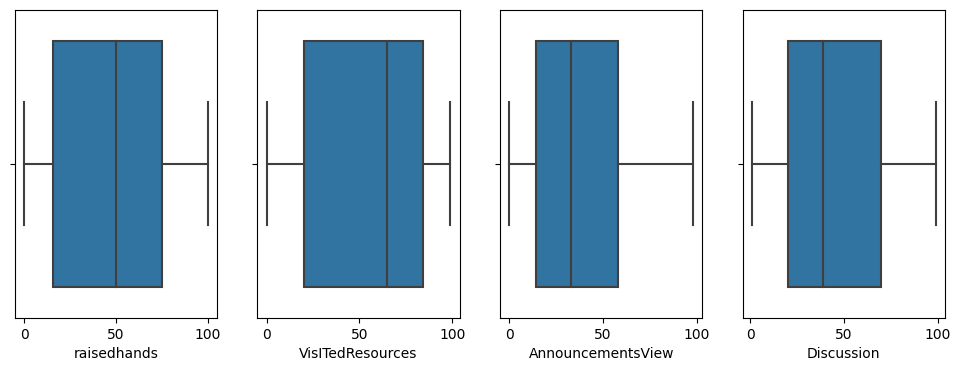

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('OurData.csv')

# Create distribution plots for each numerical column
numerical_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
fig, axs = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i])

# Create boxplots for each numerical column
fig, axs = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axs[i])


In [15]:
import pandas as pd
import numpy as np

# load your data into a pandas dataframe
df = pd.read_csv('OurData.csv')

# convert non-numeric columns to numeric data types
for col in df.columns:
    if df[col].dtype != np.number:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# calculate the median of each column
medians = df.median()

# calculate the median absolute deviation of each column
mad = df.mad()

# calculate the modified z-score for each data point
z_scores = 0.6745 * ((df - medians) / mad)

# identify and replace the outliers for each column separately
for col in df.columns:
    df.loc[z_scores[col].abs() > 3.5, col] = medians[col]


<ipython-input-15-0d3beae94c21>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype != np.number:
<ipython-input-15-0d3beae94c21>:16: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = df.mad()


<ipython-input-18-53b7add9468f>:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype != np.number:


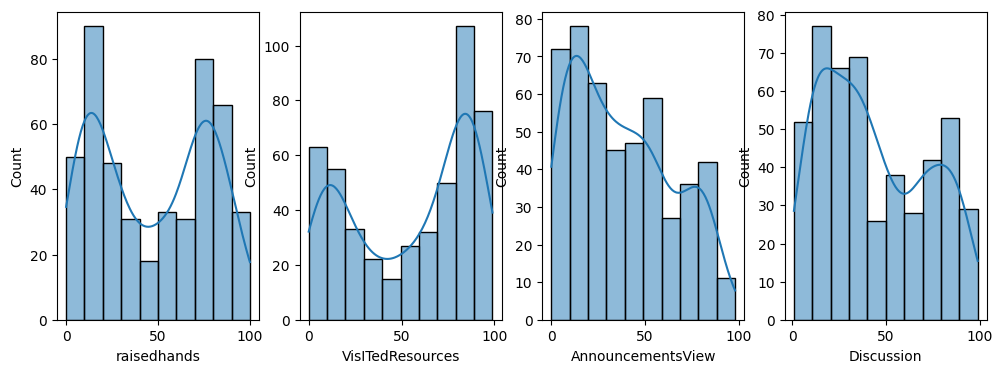

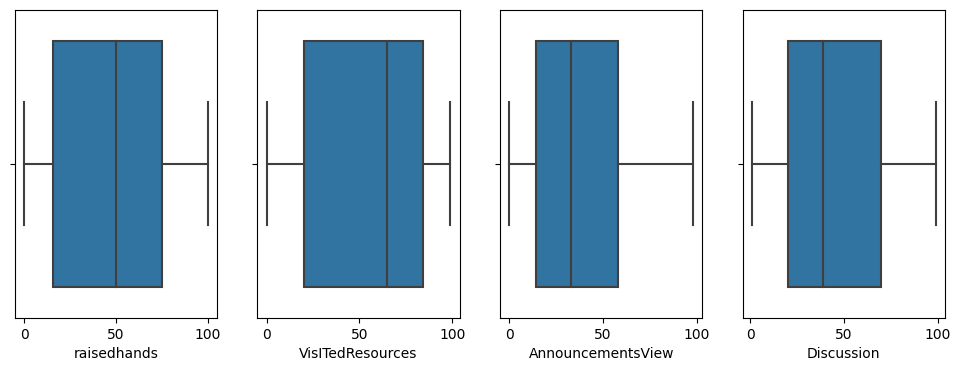

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load your data into a pandas dataframe
df = pd.read_csv('OurData.csv')

# convert non-numeric columns to numeric data types
for col in df.columns:
    if df[col].dtype != np.number:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# calculate the median of each column
medians = df.median()

# calculate the median absolute deviation of each column
mad = (df - df.median()).abs().median()

# calculate the modified z-score for each data point
z_scores = 0.6745 * ((df - medians) / mad)

# identify and replace the outliers
df[z_scores.abs() > 3.5] = np.nan
df.fillna(medians, inplace=True)

# Create distribution plots for each numerical column
numerical_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
fig, axs = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i])

# Create boxplots for each numerical column
fig, axs = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axs[i])
    
plt.show()
